# **Lab 5 : Nonlinear Regression**<br>

Regression is the process of estimating a model that produces the best fit for the given data. The simplest method of doing this is by Linear Regression, which assumes that the data are linear in the unknown parameters. But in real life, there are many scenarios where the data is not linearly related. Any model that is not linear in the unknown parameters is known as a **Nonlinear Regression** model. There are various forms of nonlinear regression models, one of which is the exponential model, which is given as $$y = ae^{bx_i}$$ where $a$ and $b$ are the parameters of the regression model. The values of these two parameters should be such that the produced result of the above function should have the least deviation from the actual data points. In order to measure how well our model fits the data or how much it deviates from the actual result, we use the least square criterion.

In today's lab, we will be implementing the Exponential Regression model in python. To test our implementation, we will be using the same data that is available in the first example of our class lecture pdf. That way, you can check whether your implementation is working correctly by comparing with the results obtained in that example. Run the following cell to load the known data points:


In [ ]:
time = [0, 1, 3, 5, 7, 9]
gamma = [1, 0.891, 0.708, 0.562, 0.447, 0.355]

##Task 1

Write a function for evaluating the following: $$f(\lambda)=\sum{\gamma_i t_i e^{\lambda t_i}}- \frac{\sum{\gamma_i e^{\lambda t_i}}}{\sum{e^{2 \lambda t_i}}} \sum{t_i e^{2 \lambda t_i}}$$

This function should take three parameters, the vector time, the vector gamma and a particular value for lambda and it will return the value of the function for that lambda.

In [ ]:
import numpy as np
def func(time, gamma, lmda):
    sum1 = np.sum([gamma[i]*time[i]*np.exp(lmda*time[i]) for i in range(len(time))])
    sum2 = np.sum([gamma[i]*np.exp(lmda*time[i]) for i in range(len(time))])
    sum3 = np.sum([np.exp(2*lmda*time[i]) for i in range(len(time))])
    sum4 = np.sum([time[i]*np.exp(2*lmda*time[i]) for i in range(len(time))])
    
    # print(sum1,sum2,sum3,sum4)

    result = sum1 - sum2*sum4/sum3
    return result

func(time,gamma,-0.12)

0.09135731245952883

In [ ]:
def bisection(time, gamma, lambda_l, lambda_u):
    max_iterations = 100
    tolerance = 1e-6
    lambda_mid=0
    for i in range(max_iterations):
      lambda_mid = (lambda_l + lambda_u) / 2.0
      func_l, func_u = func(time, gamma, lambda_l), func(time, gamma, lambda_u)
      func_mid =func(time, gamma, lambda_mid)
      # print(func_l,func_u,func_mid)
      if abs(func_mid) < tolerance:
        return lambda_mid
      
      if func_l * func_mid < 0:
        lambda_u = lambda_mid
      else:
        lambda_l = lambda_mid
    return lambda_mid

##Task 2
Assuming that the exponential model for the given data is defined as $\gamma = Ae^{\lambda t}$, write a function that takes the given data as input and returns the regression parameters $A$ and $\lambda$. Use your previously implemented function for bisection method here inside the NonLinearRegression function. For your left and right guess, choose $-0.12$ for $\lambda_l$ and $-0.11$ for $\lambda_u$ and call the function using these values. Bisection function should return the correct value for $\lambda$ as $\lambda_{mid}$ and using this value, find the parameter $A$. Your NonLinearRegression function should return the values for $A$ and $\lambda$.

In [ ]:
from math import e

def NonLinearRegression(time, gamma):
  lambda_l = -0.12
  lambda_u = -0.11

  lambda_mid = 0

  lambda_mid = bisection(time, gamma, lambda_l, lambda_u)
  
  A = sum([gamma[i] * e**(-lambda_mid * time[i]) for i in range(len(time))]) / len(time)

  return A, lambda_mid  



Write another function that takes any arbitrary value as input and applies the regression model to generate the output. Calling this function for $time = 0$ should give you a prediction close to $1$.

In [ ]:
def predict(A, l, time):
  res = A * (e ** (l * time))
  return res
  
A, l = NonLinearRegression(time, gamma)
print(predict(A, l, time[0]))



0.999877673741759


##Task 3
Generate a plot of the regression curve by recording the result of predict function for different values of time starting from $0$ to $9$ with and interval of $0.1$. Show the original data points (time, gamma) on the same plot using scatter function. Use different colors for the regression curve and the original data points and show a legend. For this task, you are allowed to use various libraries such as matplotlib.

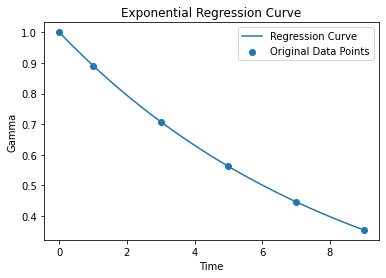

In [ ]:
#Write your code here for generating the plot

import matplotlib.pyplot as plt
A, l = NonLinearRegression(time, gamma)

time_pred = np.arange(0, 9.1, 0.1)
gamma_pred = [predict(A, l, t) for t in time_pred]

plt.plot(time_pred, gamma_pred, label='Regression Curve')
plt.scatter(time, gamma, label='Original Data Points')

plt.xlabel('Time')
plt.ylabel('Gamma')
plt.title('Exponential Regression Curve')

plt.legend()
plt.show()